In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
import glob

# 트레이닝 데이터 불러오기 및 가공

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rcp/scissor_tr"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

2711  images to be resized.
2711  images resized.
가위 이미지 resize 완료!


In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rcp/rock_tr"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

2708  images to be resized.
2708  images resized.
바위 이미지 resize 완료!


In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rcp/paper_tr"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

2704  images to be resized.
2704  images resized.
보 이미지 resize 완료!


# 데이터 라벨링

In [5]:
def load_data(img_path, number_of_data=8123):  

    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_tr/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_tr/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_tr/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rcp"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 8123 입니다.
x_train shape: (8123, 28, 28, 3)
y_train shape: (8123,)


# 데이터 확인 해보기

라벨:  0


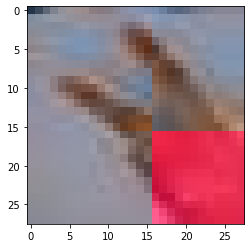

In [6]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 모델 정의

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(512, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 512)       590336    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6554112   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

# 모델 학습

In [8]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size = 128)

Epoch 1/100
64/64 [==============================] - 4s 18ms/step - loss: 5.1335 - accuracy: 0.3629
Epoch 2/100
64/64 [==============================] - 1s 15ms/step - loss: 0.9429 - accuracy: 0.5084
Epoch 3/100
64/64 [==============================] - 1s 15ms/step - loss: 0.7556 - accuracy: 0.6474
Epoch 4/100
64/64 [==============================] - 1s 15ms/step - loss: 0.5839 - accuracy: 0.7500
Epoch 5/100
64/64 [==============================] - 1s 15ms/step - loss: 0.4703 - accuracy: 0.8054
Epoch 6/100
64/64 [==============================] - 1s 15ms/step - loss: 0.4111 - accuracy: 0.8289
Epoch 7/100
64/64 [==============================] - 1s 15ms/step - loss: 0.3297 - accuracy: 0.8699
Epoch 8/100
64/64 [==============================] - 1s 15ms/step - loss: 0.2546 - accuracy: 0.9053
Epoch 9/100
64/64 [==============================] - 1s 15ms/step - loss: 0.2318 - accuracy: 0.9159
Epoch 10/100
64/64 [==============================] - 1s 15ms/step - loss: 0.2295 - accuracy: 0.9173

# 테스트 데이터셋 불러오기 및 가공,라벨링

In [9]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rcp/test2/scissor_t"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rcp/test2/rock_t"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")


def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rcp/test2/paper_t"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")



def load_data(img_path, number_of_data=2400):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_t/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_t/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_t/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rcp/test2"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

800  images to be resized.
800  images resized.
가위 이미지 resize 완료!
800  images to be resized.
800  images resized.
바위 이미지 resize 완료!
800  images to be resized.
800  images resized.
보 이미지 resize 완료!
학습데이터(x_test)의 이미지 개수는 2400 입니다.
x_test shape: (2400, 28, 28, 3)
y_test shape: (2400,)


# 결과

In [10]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose = 2)
print('test_loss:{}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

75/75 - 0s - loss: 3.7765 - accuracy: 0.7242
test_loss:3.7764627933502197
test_accuracy : 0.7241666913032532


# 프로젝트 회고

이것저것 에러가 뜨는 걸 잡고 처음 돌렸을 때 35%의 정확도를 보였다.
모델을 깊게 만들고 드롭아웃과 배치사이즈 에포크 등을 고치면 60%는 금방 넘을 줄 알았다.
하지만 코드를 고치기만 해서는 52%까지 밖에 올릴 수 없었다.
결국 데이터셋을 열심히 모았고, 300개였던 트레이닝셋을 8123개까지 모았다.
트레이닝셋을 모으고 기대를 하며 모델의 정확도를 봤는데 accuracy: 0.3333을 보고는 어떻게 정확도가 더 내려갈 수 있는건지 의아했다.
다시 모델을 고치고 레이어를 추가해보고 실행하고를 반복해서 92%의 정확도를 보고는 뿌듯했었다.
하지만 그 때 모델의 테스트셋은 내가 찍은 사진들로만 구성되어 있었고,
다른 사람의 테스트 셋을 가지고 테스트 해보니까 코드를 실행시킬때 마다 33~86까지 고점은 높지만 너무나 불안정한 모델이었다.
왜 그럴까 고민을 하다가 테스트 셋이 한 사람만의 사진이기 때문인 것은 아닐까하고 여러 사람들의 테스트 셋을 섞어서 2400개의 테스트 셋을 만들었다.
여러 사람의 테스트 셋을 사용하니 33~40정도로 안정적(?)이지만 고점이 없다시피한 테스트 결과가 나왔다.
또다시 Dense층을 여러층 쌓아보기도 하고 드롭아웃 수를 조절하고 옵티마이저를 adam에서 Nadam을 사용해보기도 하고
배치사이즈를 조정하기도 하며 여러 테스트를 하다가
지금의 모델이 여러번 새로 돌려도 62~78까지의 안정적이면서 고점도 어느정도 괜찮은 모델이라고 판단했다.

이전까지는 공부를 하던 프로젝트를 해보던 남들이 만들어놓은 모델을 보거나 사용해서 프로젝트를 했었다.
에러는 검색을 해가면서 잡아나갔지만 사실 이 코드가 왜 이렇게 만들어진건지, 왜 이런방식을 썼는지도 이해를 못했었다.
남이 사용하던 모델을 사용할 때 가장 힘들었던 것이 내가 코드를 사용하는데 익숙하지 않다보니 정확도를 위해서 건드려보고 싶어도
에러가 날까봐 코드를 건드릴 수 없었다는 것이었다.
하지만 이번 프로젝트는 코드를 한줄한줄 다 이해한 것은 아니었지만
적어도 코드가 어떤식으로 흘러가는지 어떤 부분을 건드렸을 때 어떤 에러가 나는지 어떻게 에러를 잡을 수 있는지 알 수 있었고,
모델을 내가 직접 만들어보고 이것저것 추가도해보고 사이즈 조절도 해가면서 코드를 가지고 놀아보니까
정말 재미있었고 정확도가 잘나오면 은근 뿌듯했다.

아직은 첫번째 프로젝트라서 모든 코드를 직접 작성할 수는 없었지만
나의 목표는 이런 딥러닝 모델 코드를 혼자서 작성하는 것이기 때문에 
재밌다에서 그치지 않고 더 열심히 공부해서 아이펠이 끝날때 쯤에는
혼자서 이런 프로젝트를 할 수 있었게 할 것이다.
